# Multiple Linear Regression : Least Square Method

## Diabetes Dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# inputs :
# Age
# BloodPressure
# BMI

# output :
# Glucose

x1 = df['Age'].values
x2 = df['BloodPressure'].values
x3 = df['BMI'].values
y = df['Glucose'].values

x = np.column_stack((np.ones(len(x1)), x1, x2, x3))
x

array([[ 1. , 50. , 72. , 33.6],
       [ 1. , 31. , 66. , 26.6],
       [ 1. , 32. , 64. , 23.3],
       ...,
       [ 1. , 30. , 72. , 26.2],
       [ 1. , 47. , 60. , 30.1],
       [ 1. , 23. , 70. , 30.4]])

In [5]:
# b = np.dot(p_inv, q)
p = x.T @ x
p_inv = np.linalg.inv(p)
q = x.T @ y

b = np.dot(p_inv,q)
b

array([6.81849172e+01, 6.72804434e-01, 6.01846385e-02, 8.18499565e-01])

In [6]:
b0,b1,b2,b3 = b
print(b0)
print(b1)
print(b2)
print(b3)

68.1849172165521
0.6728044339166885
0.06018463848165645
0.8184995651698017


In [10]:
y_pred = x @ b
print(y_pred)
print('\n')
print(y)

[133.66001827 114.78612924 112.63751583 109.28583425 128.07218033
 113.77630235 114.06055094 116.58928045 133.02071365 110.29408194
 124.68162062 126.61691469 133.53087924 136.12829404 127.9485261
 114.26964606 131.58464439 117.72310504 127.63403386 122.24766875
 123.81391803 135.85553315 133.76279916 116.24750427 138.11238345
 125.43816018 133.93842327 105.94799081 129.64060065 127.19930762
 142.53301548 117.46206015 106.77611301 108.84856945 125.74610654
 113.64253141 123.48129049 130.6365894  121.70987574 140.56159335
 117.35863458 131.03787342 124.59645691 148.29654714 121.37579952
 123.35419594 115.37602264 110.11752728 125.01737381  84.33222363
 103.68027741 108.4947539  112.31262576 140.20762719 128.81682449
 104.14853225 130.71988803 132.6438825  135.87268505 120.80616358
  82.31381033 125.6862198  116.59981355 108.61282162 127.26167532
 117.90480974 125.64896976 145.00327482 105.01980568 115.12096864
 117.9242632  112.93873693 137.38220203 117.56463284 113.69244873
 106.092416

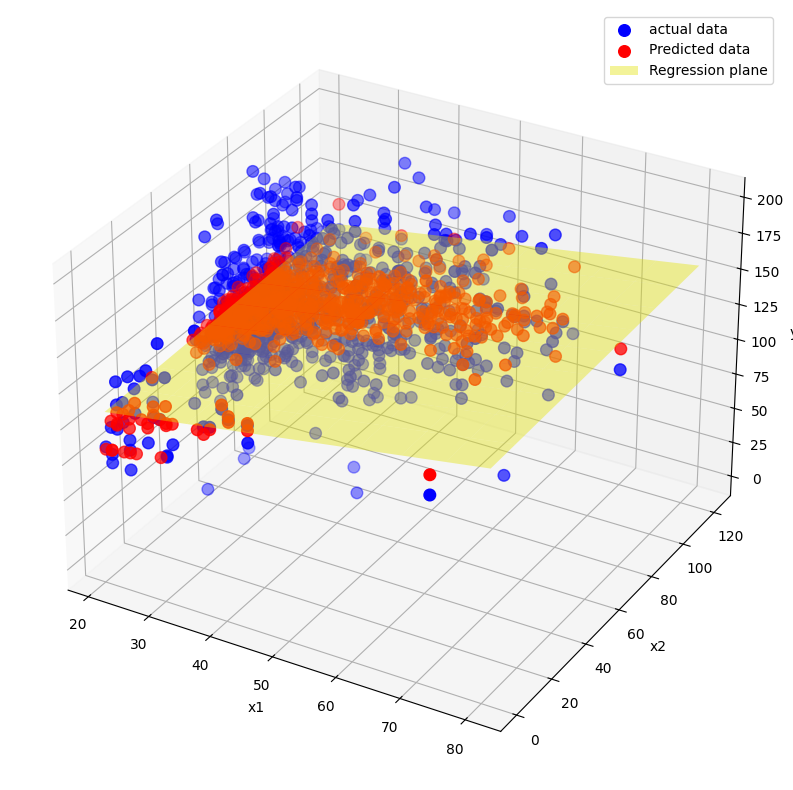

In [23]:
# the plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111,projection = '3d')

# plotting the actual data-points and predicted points
ax.scatter(x1,x2,y, color = 'blue', label = 'actual data',s = 70)
ax.scatter(x1,x2,y_pred, color = 'red', label = 'Predicted data',s = 70)

# their grids
x1_grid,x2_grid = np.meshgrid(np.linspace(min(x1),max(x1),10), np.linspace(min(x2),max(x2),10))
x3_grid = np.mean(x3) # keeping x3 fixed at its mean
y_grid = b0 + (b1*x1_grid) + (b2*x2_grid) + (b3*x3_grid)

# Prediction on training data(plot)
ax.plot_surface(x1_grid,x2_grid,y_grid, color = 'yellow', alpha = 0.4, label = 'Regression plane')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.legend()
plt.show()